## Feature Selection
#### Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

## F - score
________

#### The F-score, also called the F1-score, is a measure of a model’s accuracy on a dataset. It is used to evaluate binary classification systems, which classify examples into ‘positive’ or ‘negative’.
#### The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall.
![](https://images.deepai.org/user-content/9954225913-thumb-4901.svg)
#### The  **chi2** test returns 2 values : **F-score** and **p - value**. Based on the F-score for each feature, we will check the accuracy while considering different number of features for training at a time. Features with high F-score value are of importance.
________

### Importing the required libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te


from sklearn.feature_selection import chi2

def feat_select(df,f_score_val,num):
    feat_list = list(f_score_val["Feature"][:num])
    return df[feat_list]


from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

classifiers = ['LinearSVM', 'RadialSVM', 
               'Logistic',  'RandomForest', 
               'AdaBoost',  'DecisionTree', 
               'KNeighbors','GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]


def f_score(df,label):
    chi_values=chi2(df,label)
    score = list(chi_values[0])
    feat = df.columns.tolist()
    fscore_df = pd.DataFrame({"Feature":feat, "Score":score})
    fscore_df.sort_values(by="Score", ascending=False,inplace = True)
    fscore_df.reset_index(drop=True, inplace=True)
    return fscore_df
    
    
def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score


def acc_score_num(df,label,f_score_val,feat_list):
    Score = pd.DataFrame({"Classifier":classifiers})
    df2 = None
    for k in range(len(feat_list)):
        df2 = feat_select(df,f_score_val,feat_list[k])
        X_train,X_test,Y_train,Y_test = split(df2,label)
        j = 0
        acc = []
        for i in models:
            model = i
            model.fit(X_train,Y_train)
            predictions = model.predict(X_test)
            acc_val = accuracy_score(Y_test,predictions)
            acc.append(acc_val)
            j = j+1  
        feat = str(feat_list[k])
        Score[feat] = acc
    return Score


def plot2(df,l1,l2,p1,p2,c = "b"):
    feat = []
    feat = df.columns.tolist()
    feat = feat[1:]
    plt.figure(figsize = (16, 18))
    for j in range(0,df.shape[0]):
        value = []
        k = 0
        for i in range(1,len(df.columns.tolist())):
            value.append(df.iloc[j][i])
        plt.subplot(4, 4,j+1)
        ax = sns.pointplot(x=feat, y=value,color = c ,markers=["."])
        plt.text(p1,p2,df.iloc[j][0])
        plt.xticks(rotation=90)
        ax.set(ylim=(l1,l2))
        k = k+1
        
        
def highlight_max(data, color='aquamarine'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else: 
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

_____
### Function Description
#### 1. split():
Splits the dataset into training and test set.

#### 2. feat_select():
Returns the dataframe with first 'n' features.

#### 3. f_score():
Returns the dataframe with the F-score for each feature.

#### 4. acc_score():
Returns accuracy for all the classifiers.

#### 5. acc_score_num():
Returns accuracy for all the classifiers for the specified number of features.

#### 6. plot2():
For plotting the results.

_____

### The following 3 datasets are used:
1. Breast Cancer
2. Parkinson's Disease
3. PCOS

_____

### Plan of action:
* Looking at dataset (includes a little preprocessing)
* F-score (Displaying F-score for each feature)
* Checking Accuracy (comparing accuracies for different number of features) 
* Visualization (Plotting the graphs)
____

______________
# Breast Cancer
_____________

### 1. Looking at dataset

In [2]:
data_bc = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
label_bc = data_bc["diagnosis"]
label_bc = np.where(label_bc == 'M',1,0)
data_bc.drop(["id","diagnosis","Unnamed: 32"],axis = 1,inplace = True)

print("Breast Cancer dataset:\n",data_bc.shape[0],"Records\n",data_bc.shape[1],"Features")

Breast Cancer dataset:
 569 Records
 30 Features


In [3]:
display(data_bc.head())
print("All the features in this dataset have continuous values")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


All the features in this dataset have continuous values


### 2. F-score

In [4]:
f_score_bc = f_score(data_bc,label_bc)
f_score_bc

,Feature,Score
0,area_worst,112598.431564
1,area_mean,53991.655924
2,area_se,8758.504705
3,perimeter_worst,3665.035416
4,perimeter_mean,2011.102864
5,radius_worst,491.689157
6,radius_mean,266.104917
7,perimeter_se,250.571896
8,texture_worst,174.449400
9,texture_mean,93.897508


### 3. Checking Accuracy

In [5]:
score1 = acc_score(data_bc,label_bc)
score1

,Classifier,Accuracy
0,RandomForest,0.972028
1,Logistic,0.965035
2,KNeighbors,0.965035
3,LinearSVM,0.958042
4,GradientBoosting,0.958042
5,RadialSVM,0.951049
6,AdaBoost,0.951049
7,DecisionTree,0.930070


In [6]:
num_feat1 = list(range(8,26))
classifiers = score1["Classifier"].tolist()
score_bc = acc_score_num(data_bc,label_bc,f_score_bc,num_feat1)
score_bc.style.apply(highlight_max, subset = score_bc.columns[1:], axis=None)

,Classifier,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,RandomForest,0.979021,0.979021,0.979021,0.979021,0.972028,0.979021,0.965035,0.972028,0.979021,0.979021,0.972028,0.979021,0.979021,0.979021,0.979021,0.972028,0.979021,0.965035
1,Logistic,0.944056,0.944056,0.944056,0.944056,0.951049,0.951049,0.951049,0.951049,0.951049,0.951049,0.951049,0.951049,0.951049,0.951049,0.951049,0.951049,0.951049,0.951049
2,KNeighbors,0.972028,0.972028,0.972028,0.972028,0.972028,0.965035,0.972028,0.965035,0.979021,0.965035,0.965035,0.972028,0.965035,0.965035,0.972028,0.965035,0.972028,0.972028
3,LinearSVM,0.965035,0.965035,0.965035,0.979021,0.979021,0.979021,0.979021,0.965035,0.965035,0.972028,0.972028,0.965035,0.965035,0.972028,0.972028,0.965035,0.965035,0.965035
4,GradientBoosting,0.944056,0.951049,0.958042,0.965035,0.958042,0.965035,0.965035,0.951049,0.951049,0.965035,0.944056,0.958042,0.937063,0.951049,0.944056,0.944056,0.951049,0.958042
5,RadialSVM,0.909091,0.944056,0.944056,0.951049,0.930070,0.951049,0.944056,0.923077,0.937063,0.944056,0.930070,0.930070,0.944056,0.937063,0.944056,0.951049,0.937063,0.944056
6,AdaBoost,0.951049,0.965035,0.965035,0.965035,0.965035,0.965035,0.965035,0.965035,0.965035,0.965035,0.965035,0.965035,0.965035,0.965035,0.965035,0.965035,0.965035,0.965035
7,DecisionTree,0.944056,0.965035,0.958042,0.979021,0.965035,0.972028,0.972028,0.958042,0.951049,0.958042,0.951049,0.951049,0.944056,0.965035,0.958042,0.958042,0.958042,0.958042


#### Best Accuracy with all features : RandomForest Classifier - 0.972
#### Best Accuracy for multiple classifiers for different number of features - 0.979
#### Here we can only see a slight improvement.

### 4. Visualization

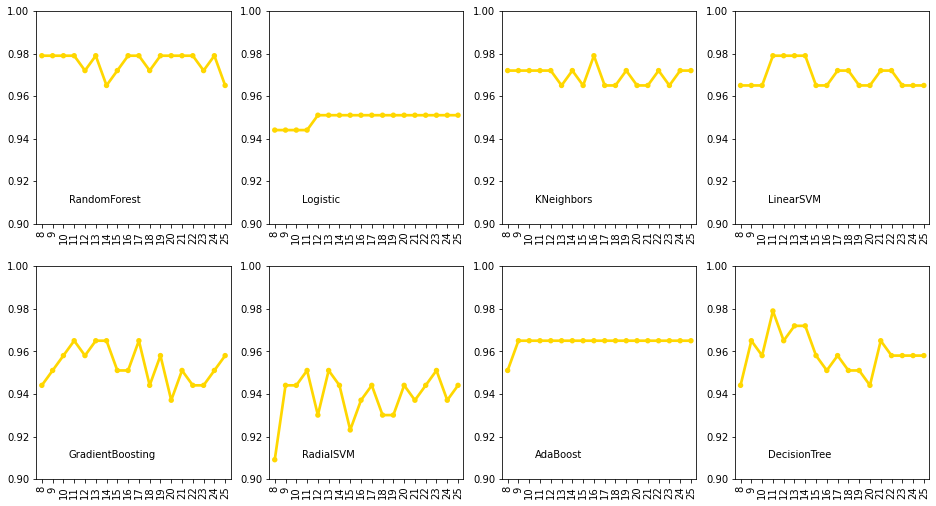

In [7]:
plot2(score_bc,0.90,1,2.5,0.91,c = "gold")

______
# Parkinson's disease
_______

### 1. Looking at dataset

In [8]:
data_pd = pd.read_csv("../input/parkinson-disease-detection/Parkinsson disease.csv")
label_pd = data_pd["status"]
data_pd.drop(["status","name"],axis = 1,inplace = True)
#Dropping columns with negative value as it does not work for chi2 test
for i in data_pd.columns:
    neg = data_pd[i]<0
    nsum = neg.sum()
    if nsum > 0:
        data_pd.drop([i],axis = 1,inplace = True)

print("Parkinson's disease dataset:\n",data_pd.shape[0],"Records\n",data_pd.shape[1],"Features")

Parkinson's disease dataset:
 195 Records
 21 Features


In [9]:
display(data_pd.head())
print("All the features in this dataset have continuous values")

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,0.234513,2.332180,0.410335


All the features in this dataset have continuous values


### 2. F-score

In [10]:
f_score_pd = f_score(data_pd,label_pd)
f_score_pd

,Feature,Score
0,MDVP:Flo(Hz),456.626628
1,MDVP:Fo(Hz),316.985398
2,MDVP:Fhi(Hz),227.402656
3,HNR,22.691579
4,MDVP:Shimmer(dB),3.210348
5,PPE,2.151107
6,D2,1.381600
7,spread2,1.232614
8,Shimmer:DDA,0.462793
9,NHR,0.457699


### 3. Checking Accuracy

In [11]:
score3 = acc_score(data_pd,label_pd)
score3

,Classifier,Accuracy
0,LinearSVM,0.918367
1,DecisionTree,0.897959
2,RandomForest,0.877551
3,KNeighbors,0.877551
4,GradientBoosting,0.877551
5,RadialSVM,0.877551
6,Logistic,0.836735
7,AdaBoost,0.836735


In [12]:
num_feat3 = list(range(7,21))
classifiers = score3["Classifier"].tolist()
score_pd = acc_score_num(data_pd,label_pd,f_score_pd,num_feat3)
score_pd.style.apply(highlight_max, subset = score_pd.columns[1:], axis=None)

,Classifier,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,LinearSVM,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551
1,DecisionTree,0.836735,0.836735,0.836735,0.836735,0.836735,0.836735,0.836735,0.857143,0.836735,0.836735,0.836735,0.836735,0.836735,0.836735
2,RandomForest,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551
3,KNeighbors,0.877551,0.918367,0.918367,0.918367,0.918367,0.918367,0.897959,0.918367,0.897959,0.897959,0.918367,0.918367,0.918367,0.918367
4,GradientBoosting,0.836735,0.836735,0.836735,0.857143,0.857143,0.877551,0.857143,0.877551,0.877551,0.857143,0.877551,0.897959,0.897959,0.897959
5,RadialSVM,0.877551,0.877551,0.897959,0.918367,0.897959,0.897959,0.918367,0.857143,0.877551,0.897959,0.877551,0.877551,0.877551,0.877551
6,Logistic,0.836735,0.836735,0.836735,0.836735,0.836735,0.836735,0.836735,0.836735,0.836735,0.836735,0.836735,0.836735,0.836735,0.836735
7,AdaBoost,0.877551,0.877551,0.918367,0.918367,0.918367,0.897959,0.918367,0.918367,0.918367,0.918367,0.897959,0.897959,0.897959,0.897959


#### Best Accuracy with all features : RandomForest Classifier - 0.918
#### Best Accuracy for multiple classifiers for different number of features - 0.918
#### Here we see no improvement.

### 4. Visualization

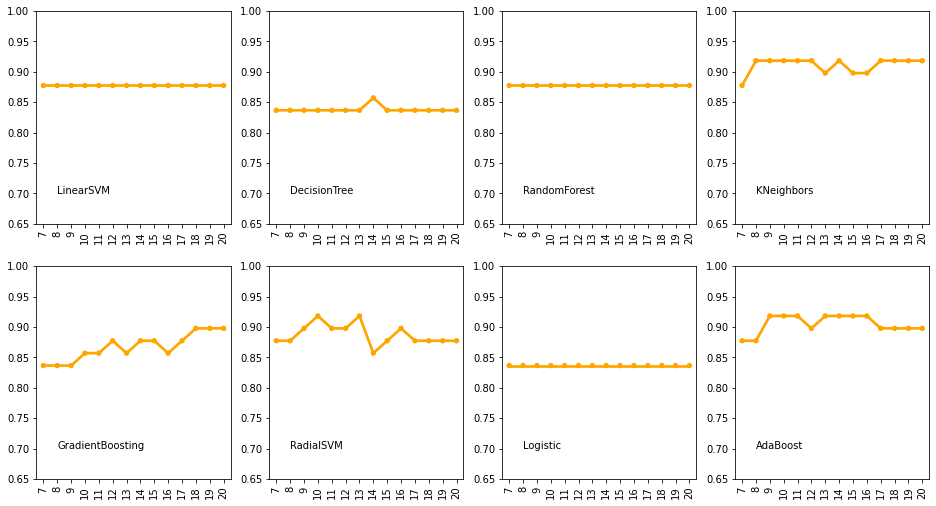

In [13]:
plot2(score_pd,0.65,1.0,1,0.7,c = "orange")

________
# PCOS
________

### 1. Looking at dataset

In [14]:
data_pcos = pd.read_csv("../input/pcos-dataset/PCOS_data.csv")
label_pcos = data_pcos["PCOS (Y/N)"]
data_pcos.drop(["Sl. No","Patient File No.","PCOS (Y/N)","Unnamed: 44","II    beta-HCG(mIU/mL)","AMH(ng/mL)"],axis = 1,inplace = True)
data_pcos["Marraige Status (Yrs)"].fillna(data_pcos['Marraige Status (Yrs)'].describe().loc[['50%']][0], inplace = True) 
data_pcos["Fast food (Y/N)"].fillna(1, inplace = True) 

print("PCOS dataset:\n",data_pcos.shape[0],"Records\n",data_pcos.shape[1],"Features")

PCOS dataset:
 541 Records
 39 Features


In [15]:
display(data_pcos.head())
print("The features in this dataset have both discrete and continuous values")

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28,44.6,152.0,19.3,15,78,22,10.48,2,5,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,36,65.0,161.5,24.9,15,74,20,11.70,2,5,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,33,68.8,165.0,25.3,11,72,18,11.80,2,5,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,37,65.0,148.0,29.7,13,72,20,12.00,2,5,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,25,52.0,161.0,20.1,11,72,18,10.00,2,5,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


The features in this dataset have both discrete and continuous values


### 2. F-score

In [16]:
f_score_pcos = f_score(data_pcos,label_pcos)
f_score_pcos

,Feature,Score
0,Vit D3 (ng/mL),9477.648952
1,I beta-HCG(mIU/mL),6950.525631
2,LH(mIU/mL),2558.471157
3,FSH(mIU/mL),1601.145511
4,Follicle No. (R),672.789402
5,Follicle No. (L),573.647927
6,FSH/LH,96.831682
7,Skin darkening (Y/N),84.870716
8,hair growth(Y/N),84.854623
9,Weight gain(Y/N),65.554147


### 3. Checking Accuracy

In [17]:
score4 = acc_score(data_pcos,label_pcos)
score4

,Classifier,Accuracy
0,KNeighbors,0.889706
1,GradientBoosting,0.860294
2,AdaBoost,0.860294
3,LinearSVM,0.852941
4,RandomForest,0.845588
5,RadialSVM,0.838235
6,DecisionTree,0.698529
7,Logistic,0.676471


In [18]:
num_feat4 = list(range(12,28))
classifiers = score4["Classifier"].tolist()
score_pcos = acc_score_num(data_pcos,label_pcos,f_score_pcos,num_feat4)
score_pcos.style.apply(highlight_max, subset = score_pcos.columns[1:], axis=None)

,Classifier,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,KNeighbors,0.882353,0.867647,0.882353,0.867647,0.867647,0.867647,0.852941,0.889706,0.875000,0.867647,0.860294,0.889706,0.845588,0.867647,0.867647,0.867647
1,GradientBoosting,0.698529,0.698529,0.698529,0.698529,0.698529,0.698529,0.698529,0.698529,0.698529,0.698529,0.698529,0.698529,0.698529,0.698529,0.698529,0.698529
2,AdaBoost,0.889706,0.852941,0.867647,0.845588,0.867647,0.875000,0.852941,0.852941,0.860294,0.852941,0.867647,0.882353,0.860294,0.867647,0.867647,0.867647
3,LinearSVM,0.904412,0.897059,0.875000,0.882353,0.882353,0.882353,0.889706,0.889706,0.904412,0.889706,0.897059,0.897059,0.882353,0.904412,0.889706,0.875000
4,RandomForest,0.838235,0.845588,0.867647,0.830882,0.845588,0.838235,0.845588,0.845588,0.838235,0.838235,0.852941,0.838235,0.852941,0.852941,0.852941,0.852941
5,RadialSVM,0.838235,0.852941,0.823529,0.852941,0.852941,0.830882,0.830882,0.852941,0.838235,0.830882,0.838235,0.860294,0.838235,0.852941,0.867647,0.838235
6,DecisionTree,0.720588,0.727941,0.727941,0.727941,0.713235,0.698529,0.683824,0.683824,0.698529,0.698529,0.676471,0.698529,0.705882,0.698529,0.698529,0.698529
7,Logistic,0.860294,0.867647,0.867647,0.867647,0.852941,0.867647,0.882353,0.882353,0.867647,0.875000,0.889706,0.882353,0.875000,0.875000,0.882353,0.889706


#### Best Accuracy with all features : RandomForest Classifier - 0.889
#### Best Accuracy for first (12,20,25) features : DecisionTree Classifier - 0.904
#### Here we can see an improvement of ~1.5%.

### 4. Visualization

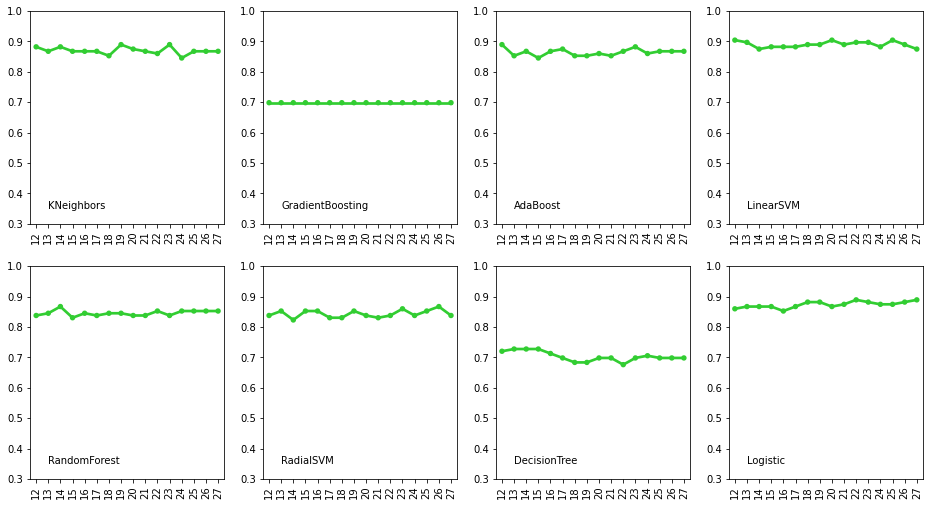

In [19]:
plot2(score_pcos,0.3,1.0,1,0.35,c = "limegreen")

_________
#### From looking at these results we can see that there is a possibility of slight improvement in the accuracy after choosing the right features as per the F-score value.
#### Link to other feature selection methods:
##### [Genetic Algorithm](https://www.kaggle.com/tanmayunhale/genetic-algorithm-for-feature-selection)
##### [Variance Threshold](https://www.kaggle.com/tanmayunhale/feature-selection-variance-threshold)
##### [Pearson Correlation](https://www.kaggle.com/tanmayunhale/feature-selection-pearson-correlation)